<a href="https://colab.research.google.com/github/ParthDhabalia1024/CODSOFT/blob/main/House_Prediction(Bharat_Intern).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv(r"/content/Housing.csv", encoding="unicode_ escape")
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
data.shape

(545, 13)

In [6]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [7]:
data.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

In [8]:
data["price"].unique()

array([13300000, 12250000, 12215000, 11410000, 10850000, 10150000,
        9870000,  9800000,  9681000,  9310000,  9240000,  9100000,
        8960000,  8890000,  8855000,  8750000,  8680000,  8645000,
        8575000,  8540000,  8463000,  8400000,  8295000,  8190000,
        8120000,  8080940,  8043000,  7980000,  7962500,  7910000,
        7875000,  7840000,  7700000,  7560000,  7525000,  7490000,
        7455000,  7420000,  7350000,  7343000,  7245000,  7210000,
        7140000,  7070000,  7035000,  7000000,  6930000,  6895000,
        6860000,  6790000,  6755000,  6720000,  6685000,  6650000,
        6629000,  6615000,  6580000,  6510000,  6475000,  6440000,
        6419000,  6405000,  6300000,  6293000,  6265000,  6230000,
        6195000,  6160000,  6125000,  6107500,  6090000,  6083000,
        6020000,  5950000,  5943000,  5880000,  5873000,  5866000,
        5810000,  5803000,  5775000,  5740000,  5652500,  5600000,
        5565000,  5530000,  5523000,  5495000,  5460000,  5425

In [9]:
data["area"].unique()

array([ 7420,  8960,  9960,  7500,  8580, 16200,  8100,  5750, 13200,
        6000,  6550,  3500,  7800,  6600,  8500,  4600,  6420,  4320,
        7155,  8050,  4560,  8800,  6540,  8875,  7950,  5500,  7475,
        7000,  4880,  5960,  6840,  7482,  9000,  6360,  6480,  4300,
        7440,  6325,  5150, 11440,  7680,  8880,  6240, 11175,  7700,
       12090,  4000,  5020,  4040,  4260,  6500,  5700, 10500,  3760,
        8250,  6670,  3960,  7410,  5000,  6750,  4800,  7200,  4100,
        6400,  6350,  4500,  5450,  3240,  6615,  8372,  9620,  6800,
        8000,  6900,  3700,  7020,  7231,  6254,  7320,  6525, 15600,
        7160, 11460,  5828,  5200,  5400,  4640,  5800,  6660,  4700,
        5136,  4400,  3300,  3650,  6100,  2817,  7980,  3150,  6210,
        6825,  6710,  6450, 10269,  8400,  5300,  3800,  9800,  8520,
        6050,  7085,  3180,  3410,  3000, 11410,  5720,  3540,  7600,
       10700,  8150,  4410,  7686,  2800,  5948,  4200,  4520,  4095,
        4120,  4770,

In [10]:
data["bedrooms"].unique()

array([4, 3, 5, 2, 6, 1])

In [11]:
data["bathrooms"].unique()

array([2, 4, 1, 3])

In [12]:
data["stories"].unique()

array([3, 4, 2, 1])

In [13]:
data["mainroad"].unique()

array(['yes', 'no'], dtype=object)

In [14]:
data["guestroom"].unique()

array(['no', 'yes'], dtype=object)

In [15]:
data["basement"].unique()

array(['no', 'yes'], dtype=object)

In [16]:
data["parking"].unique()


array([2, 3, 0, 1])

In [17]:
data["furnishingstatus"].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [18]:
data.duplicated().sum()

0

In [19]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

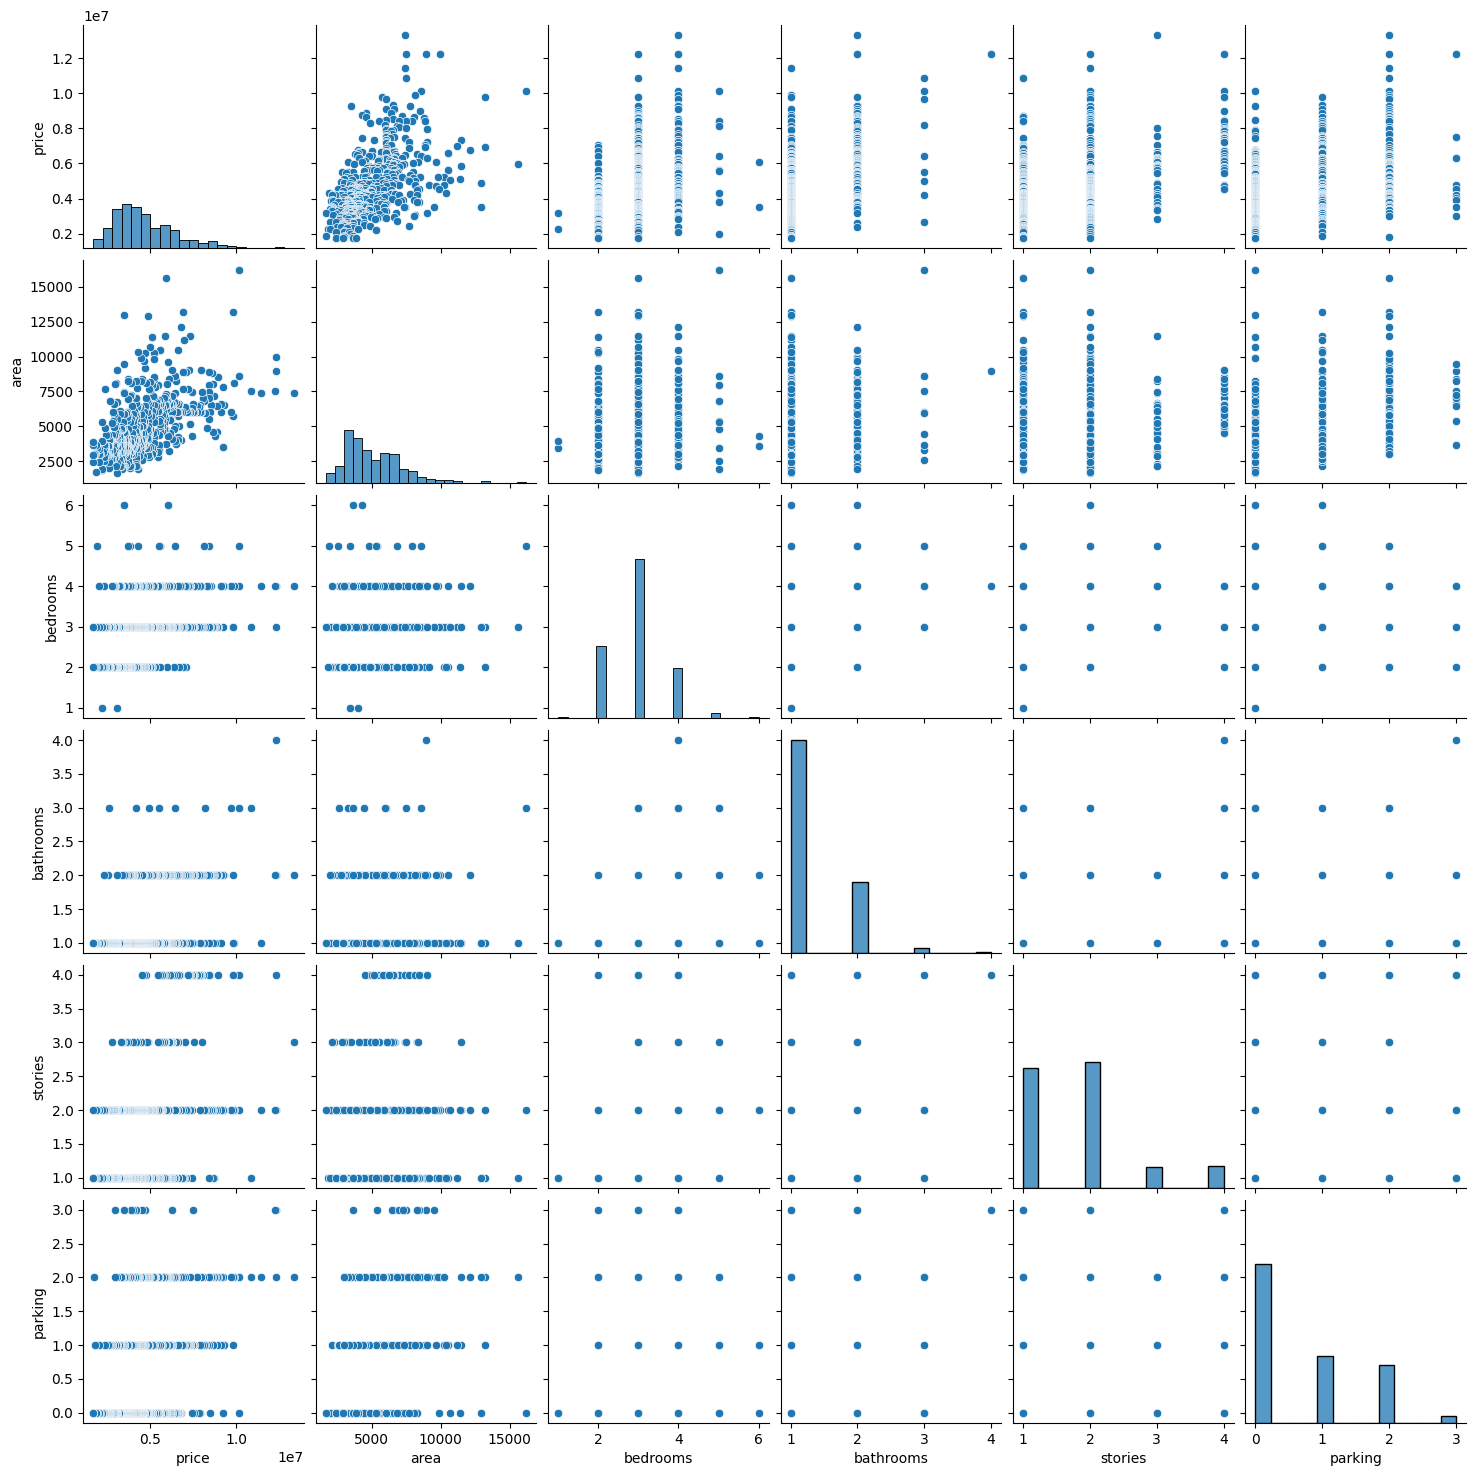

In [20]:
sns.pairplot(data)
plt.show()

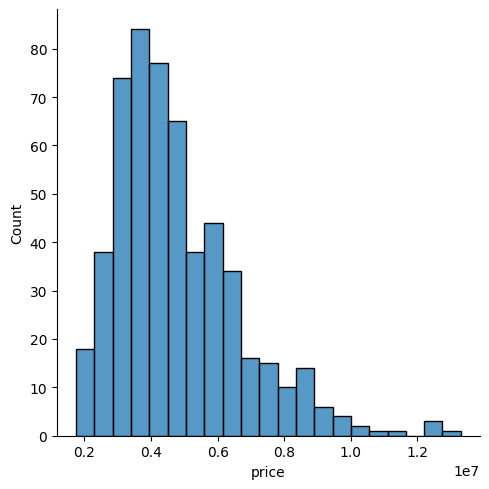

In [21]:
sns.displot(data["price"])
plt.show()

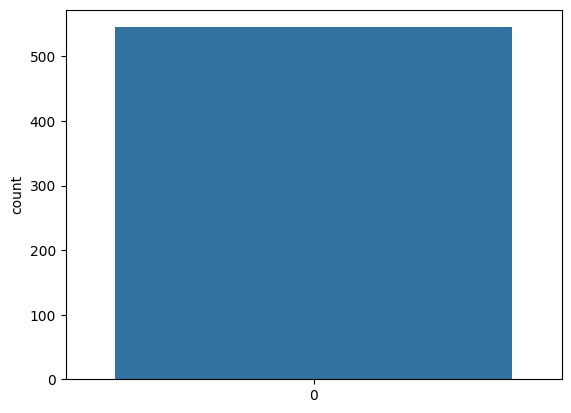

In [22]:
sns.countplot(data['bedrooms'])
plt.show()

In [23]:
cat_data=data.select_dtypes(include=["object"]).columns

for column in cat_data:
    un_values=data[column].unique()
    print(f"Unique Values for {column}:{un_values}")

Unique Values for mainroad:['yes' 'no']
Unique Values for guestroom:['no' 'yes']
Unique Values for basement:['no' 'yes']
Unique Values for hotwaterheating:['no' 'yes']
Unique Values for airconditioning:['yes' 'no']
Unique Values for prefarea:['yes' 'no']
Unique Values for furnishingstatus:['furnished' 'semi-furnished' 'unfurnished']


In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["furnishingstatus"]=le.fit_transform(data["furnishingstatus"])
data["mainroad"]=le.fit_transform(data["mainroad"])
data["guestroom"]=le.fit_transform(data["guestroom"])
data["basement"]=le.fit_transform(data["basement"])
data["hotwaterheating"]=le.fit_transform(data["hotwaterheating"])
data["airconditioning"]=le.fit_transform(data["airconditioning"])
data["prefarea"]=le.fit_transform(data["prefarea"])

In [25]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


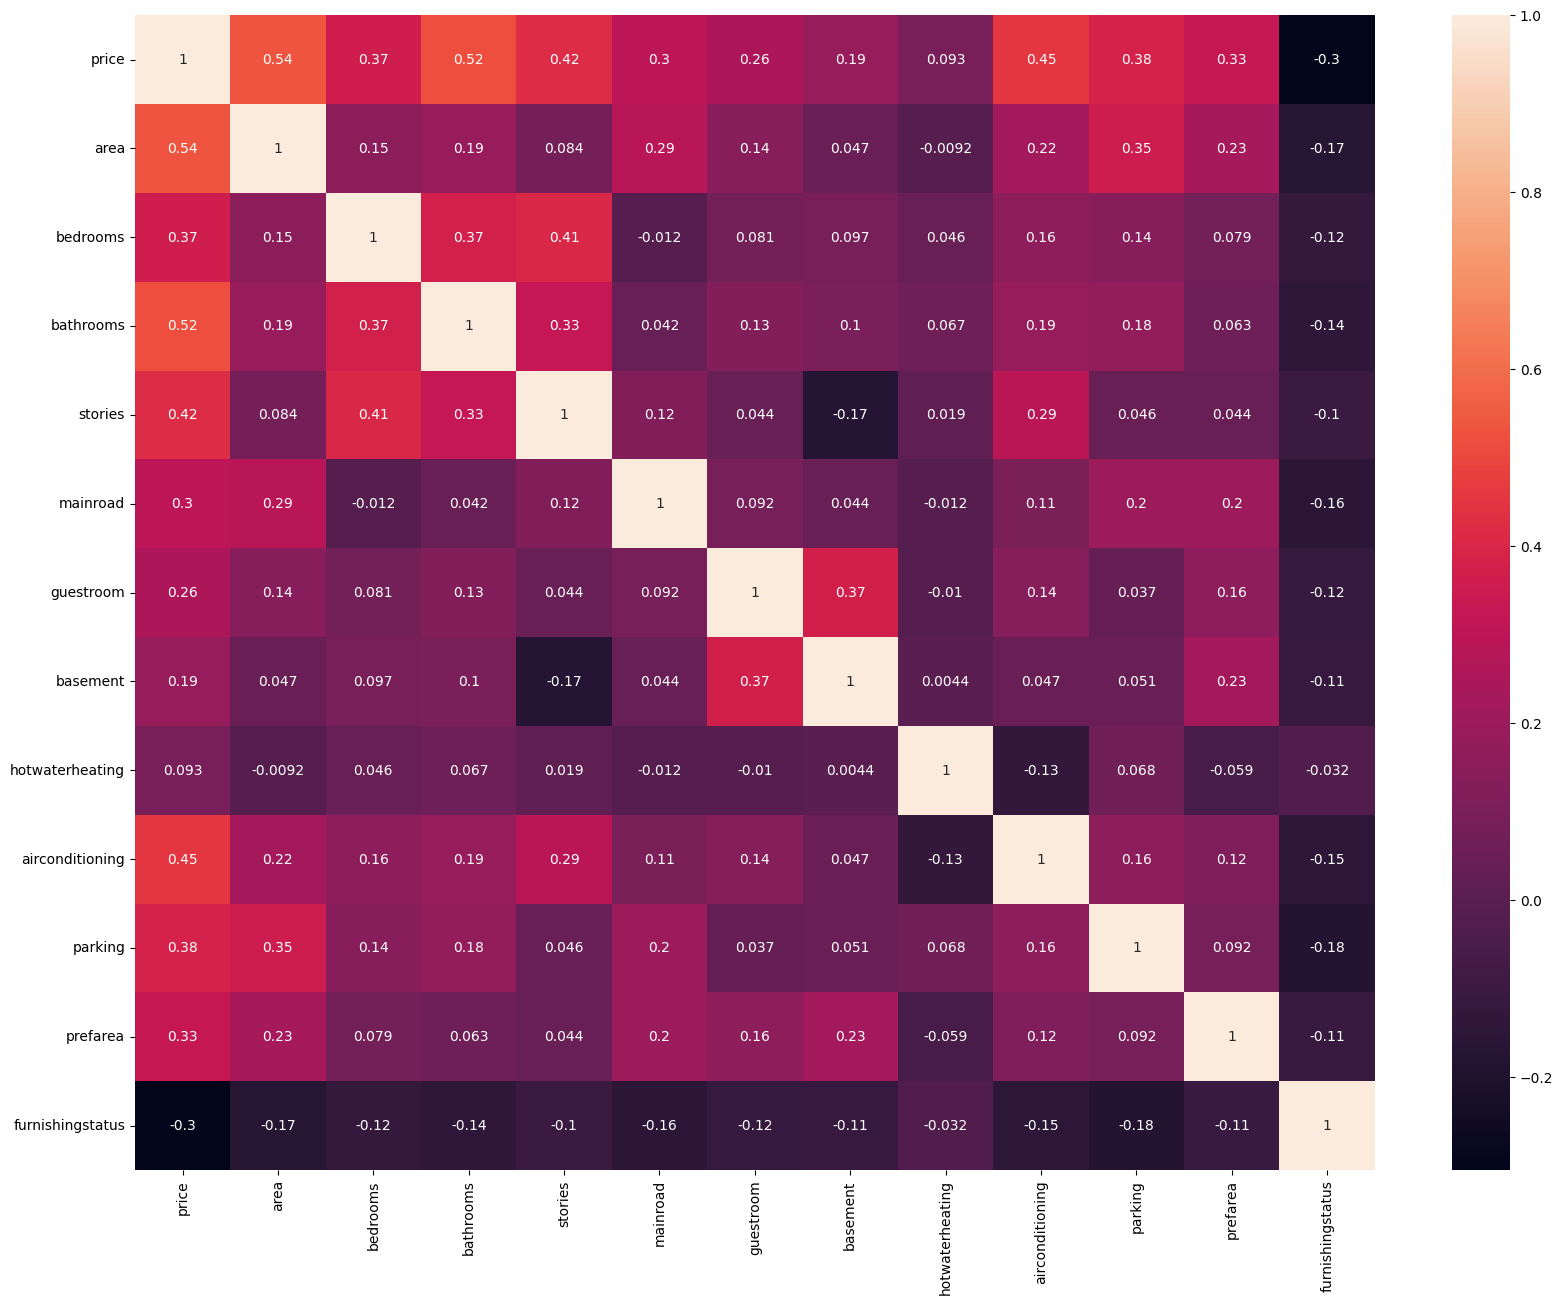

In [26]:
data_s=data.corr()
plt.figure(figsize=(20,15))
sns.heatmap(data_s, annot=True)
plt.show()

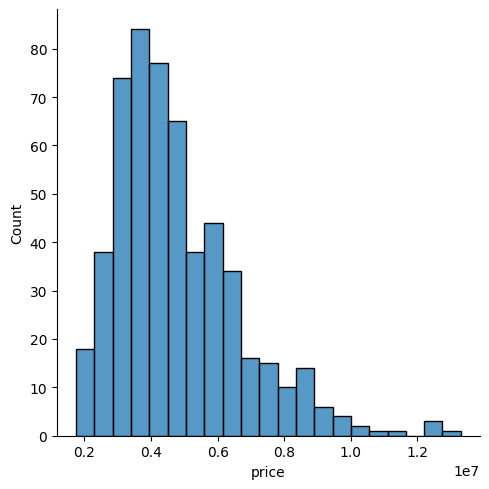

In [27]:
sns.displot(data['price'])
plt.show()

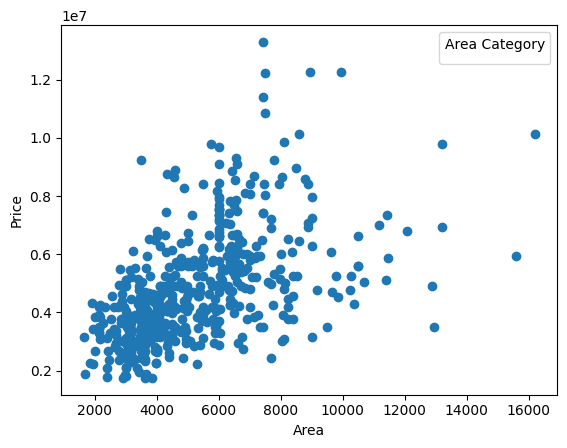

In [28]:
plt.scatter(data["area"], data["price"])

# Customize the plot
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend(title='Area Category')

# Show the plot
plt.show()

In [29]:
data1=data.copy()

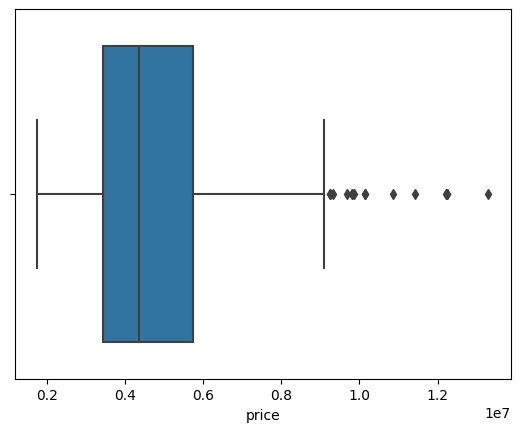

In [30]:
sns.boxplot(x=data1['price'])
plt.show()

In [31]:
# Calculate the 5th and 95th percentiles
q5 = data["price"].quantile(0.05)
q95 = data["price"].quantile(0.95)

# Filter out values outside the percentile range
data1 = data[(data["price"] >= q5) & (data["price"] <= q95)]

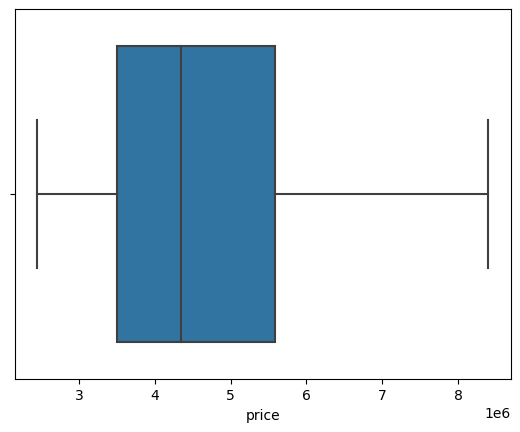

In [32]:
# Create box plots for numerical features
sns.boxplot(x=data1['price'])
plt.show()

In [33]:
data1.shape

(494, 13)

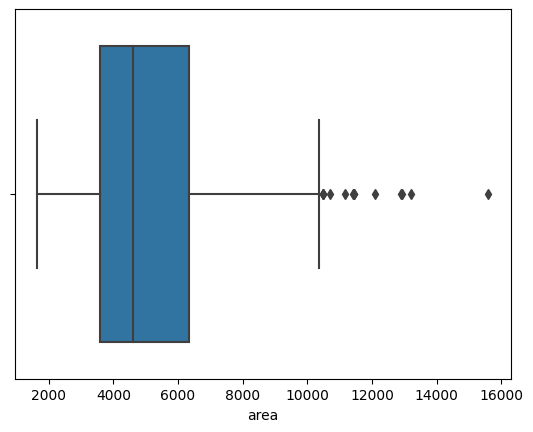

In [34]:
sns.boxplot(x=data1['area'])
plt.show()

In [35]:
# Calculate the 5th and 95th percentiles
q5 = data["area"].quantile(0.05)
q95 = data["area"].quantile(0.95)

# Filter out values outside the percentile range
data1 = data[(data["area"] >= q5) & (data["area"] <= q95)]

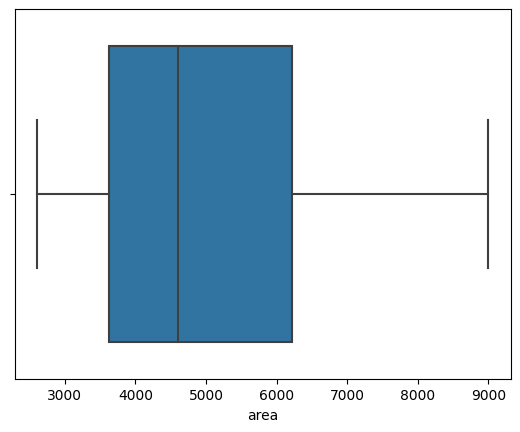

In [36]:
sns.boxplot(x=data1['area'])
plt.show()

In [37]:
data1.shape

(492, 13)

In [38]:
data1

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,1855000,2990,2,1,1,0,0,0,0,0,1,0,2
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


In [39]:
data2=data1.copy()

In [42]:
from sklearn.model_selection import train_test_split
X=data2.drop(["price"], axis=1)
y=data2["price"]

In [43]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_scaler=ss.fit_transform(X)

In [44]:
X_train,X_test,y_train,y_test=train_test_split(X_scaler,y, test_size=0.2, random_state=7)

In [45]:
X_train.shape

(393, 12)

In [46]:
X_test.shape

(99, 12)

In [47]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr_model=lr.fit(X_train,y_train)

In [48]:
y_pred=lr_model.predict(X_test)
y_pred

array([4084034.58450099, 7468828.12700789, 4166178.83362697,
       5847278.71909358, 6428994.47700714, 4852987.59366144,
       2280800.22177787, 3254034.82305411, 7433778.59404818,
       4258940.20471688, 4537999.90866966, 6062817.56742962,
       3848862.71534219, 4662065.64072118, 2153629.17024139,
       3559626.44134971, 4545176.9310101 , 7856448.1580879 ,
       4250931.9676081 , 5287979.43858263, 2740311.57588243,
       3859882.59125243, 2853281.71974306, 3359325.42527946,
       4373870.99605481, 3388093.93346549, 6481359.91183078,
       4688807.21033504, 6701330.71675512, 5205089.60772504,
       4908676.60261221, 2842522.658423  , 2748111.89533947,
       5088397.98535034, 5834415.84595021, 7015132.98781829,
       2787718.99602852, 3422336.62783624, 4784038.94890369,
       3496503.45711023, 5086248.36667821, 3840762.12272939,
       5015245.83611295, 2842522.658423  , 5355269.72823322,
       4372803.96436148, 4376897.01128789, 6143669.21765817,
       2812882.01230889,

In [49]:
lr_model.score(X_test,y_test)

0.7019692758360192

In [50]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=7)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.70196928, 0.60575256, 0.63983643, 0.6826576 , 0.76048246])

In [51]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.svm import SVR

models=[("LinearRegression",LinearRegression()),("LogisticRegression",LogisticRegression()),("DecisionTreeRegressor",DecisionTreeRegressor(random_state=42)),
        ("RandomForestRegressor",RandomForestRegressor(random_state=42)),("Ridge",Ridge()),("Lasso",Lasso()),("KNeighborsClassifier",KNeighborsClassifier()),
        ("GradientBoostingRegressor",GradientBoostingRegressor()),("SVR",SVR())]

for name,model in models:
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    r2=r2_score(y_test,y_pred)
    print(f'Model: {name}')
    print(f'R-squared (R2): {r2}\n')


Model: LinearRegression
R-squared (R2): 0.7019692758360192

Model: LogisticRegression
R-squared (R2): 0.2113422203799341

Model: DecisionTreeRegressor
R-squared (R2): 0.12894495219130686

Model: RandomForestRegressor
R-squared (R2): 0.6755862618461234

Model: Ridge
R-squared (R2): 0.7019701967575149

Model: Lasso
R-squared (R2): 0.7019691655541447

Model: KNeighborsClassifier
R-squared (R2): 0.22575663385869416

Model: GradientBoostingRegressor
R-squared (R2): 0.6788348921050739

Model: SVR
R-squared (R2): -0.0001589700065998123



In [52]:
import joblib
joblib.dump(lr_model,"Predicting_Housing_Price.pkl")

['Predicting_Housing_Price.pkl']

In [54]:
import joblib

model = joblib.load("Predicting_Housing_Price.pkl")

def get_user_inputs():
    print("Please provide the following information:")
    print("Print if your answer yes then 1 else 0")
    print("Print if Furnishing status options: furnished=0, semi-furnished=1, unfurnished=2")
    area = float(input("Area in square feet: "))
    bedrooms = int(input("Number of bedrooms: "))
    bathrooms = int(input("Number of bathrooms: "))
    stories = int(input("Number of stories: "))
    mainroad = int(input("Main road access (yes=1/no=0): "))
    guestroom = int(input("Guest room available (yes=1/no=0): "))
    basement = int(input("Basement available (yes=1/no=0): "))
    hotwaterheating = int(input("Hot water heating (yes=1/no=0): "))
    airconditioning = int(input("Air conditioning (yes=1/no=0): "))
    parking = int(input("Number of parking spaces: "))
    prefarea = int(input("Preferred area yes=1/no=0): "))
    furnishingstatus =int(input("Furnishing status: "))


    user_inputs = {
        "area": area,
        "bedrooms": bedrooms,
        "bathrooms": bathrooms,
        "stories": stories,
        "mainroad": mainroad,
        "guestroom": guestroom,
        "basement": basement,
        "hotwaterheating": hotwaterheating,
        "airconditioning": airconditioning,
        "parking":parking,
        "prefarea": prefarea,
        "furnishingstatus":furnishingstatus
    }

    return user_inputs


user_inputs = get_user_inputs()

user_df = pd.DataFrame([user_inputs])

predicted_price = model.predict(user_df)

print(f"Predicted Housing Price: ${predicted_price[0]:,.2f}")






Please provide the following information:
Print if your answer yes then 1 else 0
Print if Furnishing status options: furnished=0, semi-furnished=1, unfurnished=2
Area in square feet: 800
Number of bedrooms: 5
Number of bathrooms: 2
Number of stories: 1
Main road access (yes=1/no=0): 1
Guest room available (yes=1/no=0): 1
Basement available (yes=1/no=0): 1
Hot water heating (yes=1/no=0): 1
Air conditioning (yes=1/no=0): 1
Number of parking spaces: 5
Preferred area yes=1/no=0): 1
Furnishing status: 0
Predicted Housing Price: $355,829,342.10
